Nama: Muhammad Zukri Al Walidani
Batch: 007
Phase: 1

Data berikut merupakan data yang digunakan untuk ramalan atau memprediksi cuaca. Terdapat indikator indikator yang dapat dilihat sebagai referensi prediksi. Buatla mmodel prediksi melalui logistic regression dan SVM dan bandingkan mana yang lebih baik.

Import Pustaka

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [4]:
df=pd.read_csv('weatherAUS.csv')

Eksplorasi Sederhana

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#melihat data kategori
df.describe(include= "object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-03-20,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [8]:
#melihat missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#nelihat fitur kategori

cat_features = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print("Fitur kategori : {}  ".format(len(cat_features)))
print("list fitur {} ".format(cat_features))

Fitur kategori : 7  
list fitur ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [10]:
#nelihat fitur numerik
num_features = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print("Fitur Numerik : {}  ".format(len(num_features)))
print("List fitur {} ".format(num_features))

Fitur Numerik : 16  
List fitur ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


In [12]:
#melihat variasi data
for i  in cat_features:
  count = len(df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


In [14]:
#data 'Date' terlalu banyak kardinality oleh karena itu diubah menjadi 3 kolom
df["Date"] = pd.to_datetime(df["Date"])  
df["Year"] = df["Date"].dt.year           
df["Month"] = df["Date"].dt.month         
df["Day"] = df["Date"].dt.day             

In [15]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,1017.9,8.0,8.0,15.0,20.9,No,NaN,2017,6,25


In [16]:
#menghapus date
df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [18]:
#mengmpulkan data kategori
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype =="O"]
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
#melihat misiing value pada data kategori
missing_cat = df[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


Menangani Missing Value

In [24]:
#mengisi data kategori dengan nilai yang paling sering muncul
cat_features_with_null = [features for features in categorical_features if df[features].isnull().sum()]  
for each_feature in cat_features_with_null:
  df[each_feature] = df[each_feature].fillna(df[each_feature].mode()[0])     

In [25]:
#pengelompokan data nunmerik
num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"] 


In [35]:
#melihat missing value pada data numeruk
missing_num = df[num_col].isnull().sum()
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [38]:
#menghapus Outliers
num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values
features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  df.loc[df[feature]<lower_limit, feature] = lower_limit
  df.loc[df[feature]>upper_limit, feature] = upper_limit


In [43]:
#mengsisi missing value dengan nilai rata rata
for features in num_col_with_null_values:
  df[features] = df[features].fillna(df[features].mean())

In [44]:
#pengecekan missing value
df[num_col_with_null_values].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

EDA

In [46]:
#membuat data numerik
df_num = df.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

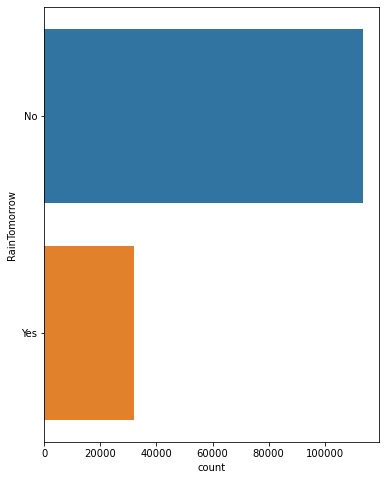

(145460, 6)

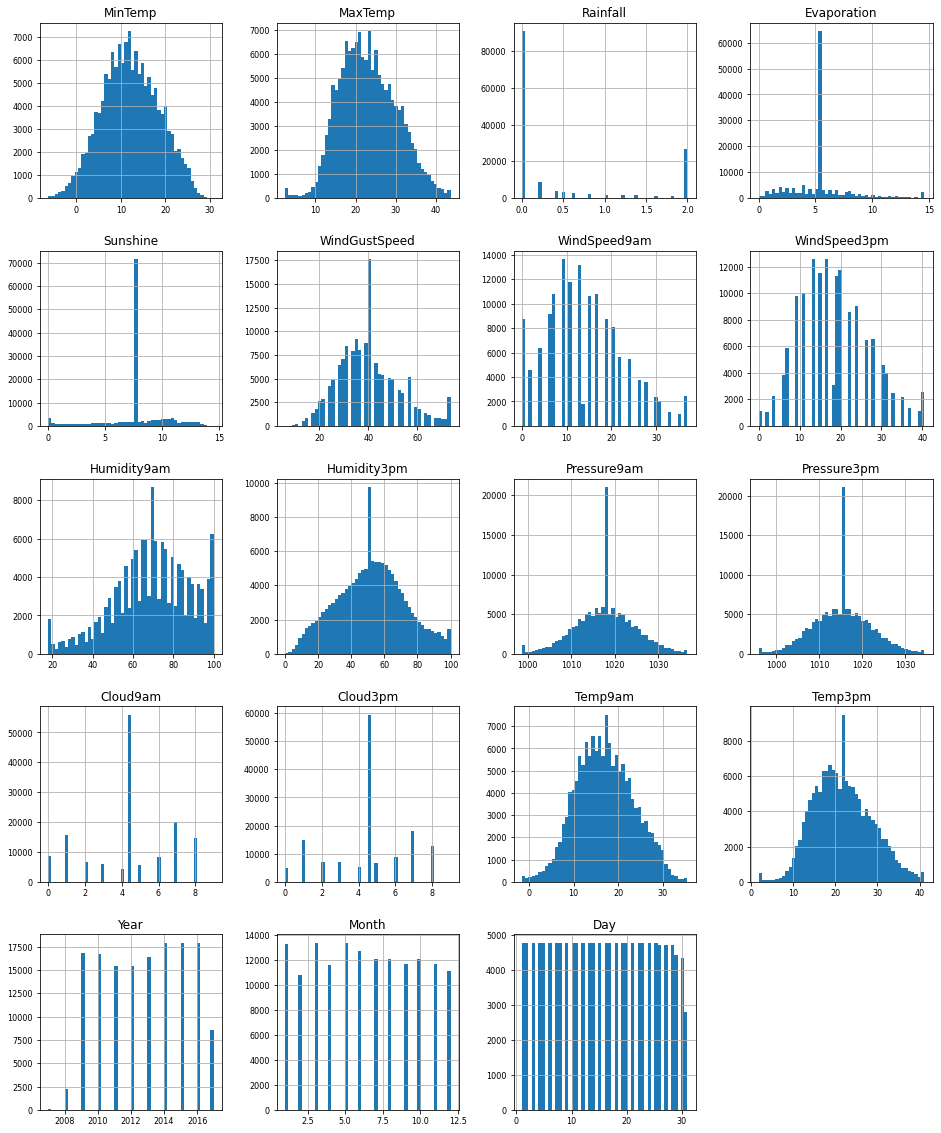

In [49]:
df_num.shape

df['RainTomorrow'].unique()

#melihat frekuensi 
df['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=df)
plt.show()

# Histogram fitur numerik

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# mengeksplor fitur kategori

df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

Prediksi hujan didominasi oleh No artinya lebih sering tidak hujan

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

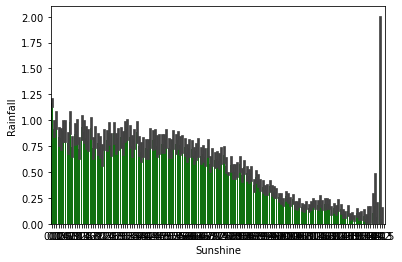

In [53]:
sns.barplot(data= df,x="Sunshine",y="Rainfall",color = "green")

Terlihat bahwa hujan dan sinar matahari proporsional

In [55]:
#data kategori
cat_fea = [i for i in df.columns if df[i].dtype == "O"]
cat_fea

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [56]:
#mengubah data ketegori menjadi data nnumerik
def encode_cat(feature):   
  mapping_dic = {}        
  unique_val = list(df[feature].unique())  
  for idx in range(len(unique_val)):    
    mapping_dic[unique_val[idx]] = idx    
  return mapping_dic      

In [58]:
for i in cat_fea:   
  df[i].replace(encode_cat(i), inplace = True)  
  print(df.head())

   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0         0     13.4     22.9       0.6     5.318667  7.611178           W   
1         0      7.4     25.1       0.0     5.318667  7.611178         WNW   
2         0     12.9     25.7       0.0     5.318667  7.611178         WSW   
3         0      9.2     28.0       0.0     5.318667  7.611178          NE   
4         0     17.5     32.3       1.0     5.318667  7.611178           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1  8.000000   4.50993   
1           44.0        NNW        WSW  ...       1007.8  4.447461   4.50993   
2           46.0          W        WSW  ...       1008.7  4.447461   2.00000   
3           24.0         SE          E  ...       1012.8  4.447461   4.50993   
4           41.0        ENE         NW  ...       1006.0  7.000000   8.00000   

   Temp9am  Temp3pm  RainToday  RainTomorrow    Ye

<AxesSubplot:>

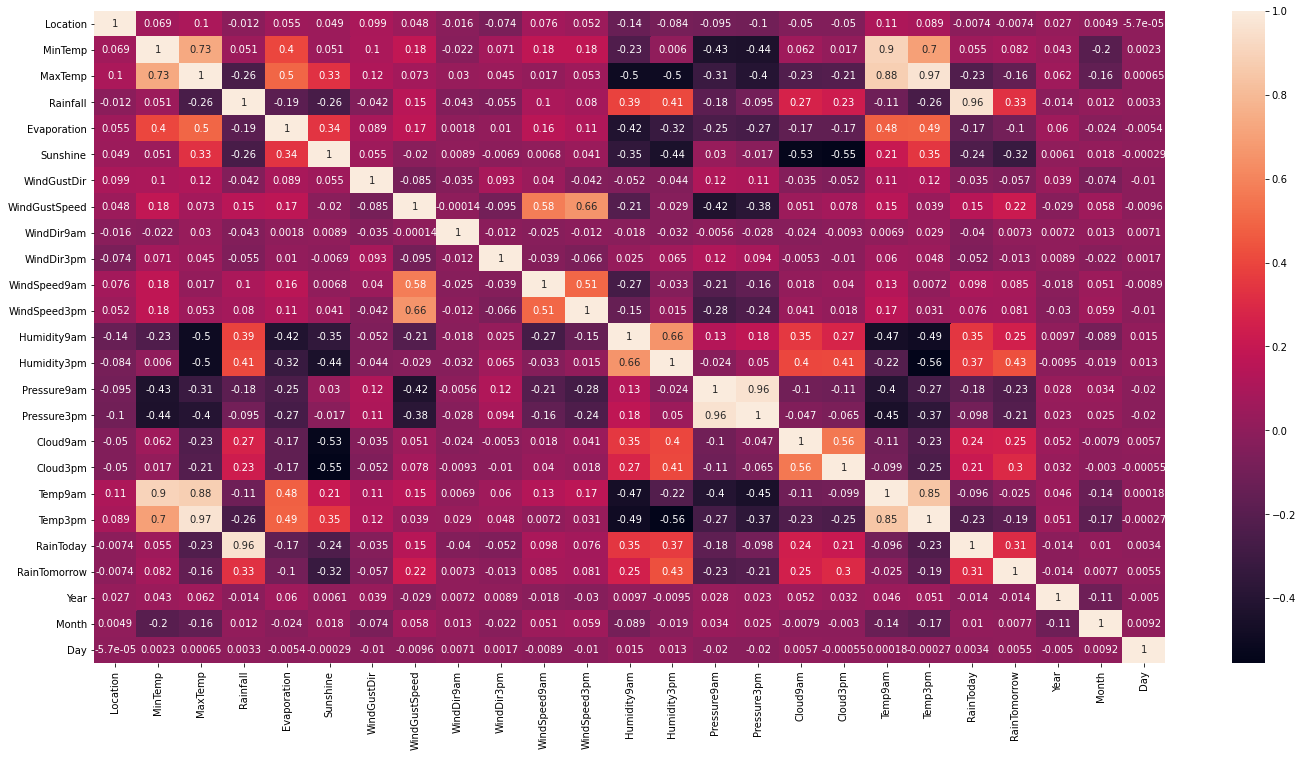

In [59]:
plt.figure(figsize =(24,12))
sns.heatmap(df.corr(), annot = True)

dari headmap berikut terlihat signifikansi antar varibael

Splitting Data Train dan Test

In [60]:
y = df["RainTomorrow"]  # dependent or target 
x = df.drop(["RainTomorrow"],axis = 1)  # indepedent or input 

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

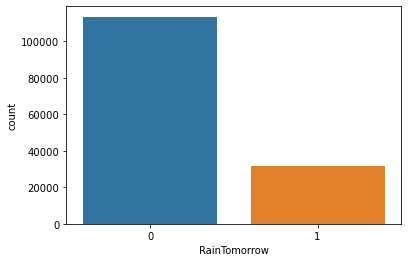

In [61]:
sns.countplot(df["RainTomorrow"])

In [62]:
#mencari fitur importan
from sklearn.ensemble import ExtraTreesRegressor
feat_sel_model = ExtraTreesRegressor()
feat_sel_model.fit(x,y)
features_imp = feat_sel_model.feature_importances_
features_imp

array([0.03471836, 0.03014785, 0.02870245, 0.04131406, 0.02343033,
       0.04398379, 0.03000126, 0.05634895, 0.03058531, 0.03151663,
       0.03111913, 0.03234063, 0.03677277, 0.20144041, 0.0354395 ,
       0.05056203, 0.02399202, 0.03614451, 0.02790223, 0.02821055,
       0.05171993, 0.03077399, 0.03047973, 0.03235359])

<AxesSubplot:>

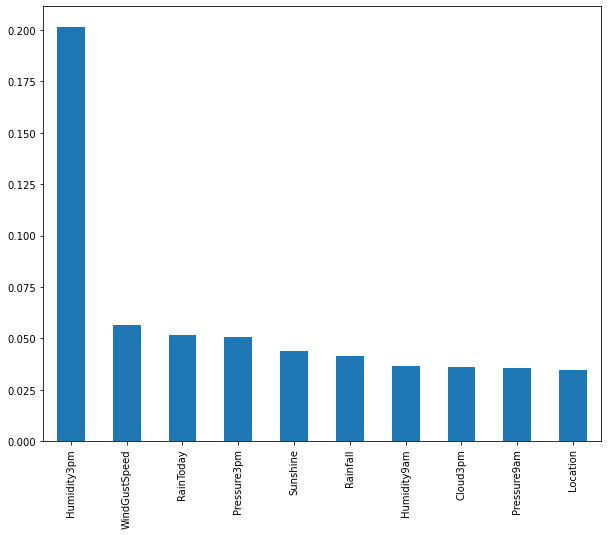

In [63]:
features_imp_val = pd.Series(features_imp, index = x.columns)
plt.figure(figsize=(10,8))
features_imp_val.nlargest(10).plot(kind = "bar")

terlihat yang paling tinggi adalah Humidity3 pm

In [64]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [65]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [67]:
x_test = scaler.transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [69]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


In [71]:
print("Train Data Score: {}".format(classifier_logreg.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(x_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


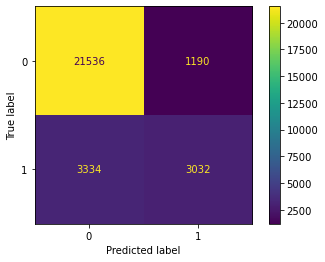

In [72]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)

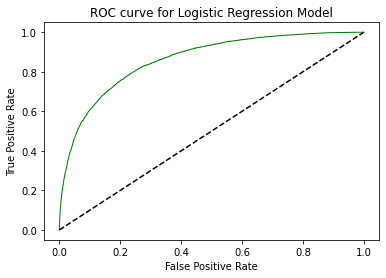

In [73]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
df.info